In [8]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate
from scipy.linalg import eig
import numpy.linalg as la
from scipy.linalg import eigh_tridiagonal
# Minhas funçoes
# Potenciais
from funcoes import harmonic_oscilator_potential
# Bases
from funcoes import basis_sin
# Funcoes do algortimo
from funcoes import second_derivative,Plane_wave, bloch_periodic,derivative_matrix
from funcoes import integrand_matrix, matrix_Tmn, integrand_matrix_potential, matrix_Vmn , matrix_Hmn

%matplotlib inline

In [9]:
# Parâmetros do problema
a = 0 # início do intervalo
b = 1 # final do intervalo
interval_number = 2000 # numero de divisoes do espaço

# step (h) do intervalo de x 

h = (b-a)/interval_number
w = 50

In [10]:
# Arrays declarados
# x = np.linspace(a, b, interval_number,dtype=np.cdouble)
x = np.linspace(a, b, interval_number) # array com o intervalo
n = np.linspace(1, 10, 10) # numero de bases
K = np.linspace(-np.pi/b,np.pi/b,100)

In [11]:
# psi = Plane_wave(x, n, b) # Cria a base
psi = basis_sin(x,n,b)
V_x = harmonic_oscilator_potential(x,w,b)
# bloch = bloch_periodic(x, K) # Funcao de bloch
psi_der = derivative_matrix(psi, n, h) # Calcula a derivada
integrand_matrix = integrand_matrix(psi,psi_der,n,interval_number) # Calcula a matrix  do integrando T_mn
T_mn = matrix_Tmn(integrand_matrix,x,n) # Calcula a matrix T_mn 
integrand_potential_matrix = integrand_matrix_potential(psi,V_x,n,interval_number) # Calcula a matrix  do integrando V_mn
V_mn = matrix_Vmn(integrand_potential_matrix,x,n) # Calcula a matrix V_mn
H_mn = matrix_Hmn(T_mn, V_mn,n)

In [12]:
eig_values, eig_vecs = eig(H_mn)
eig_values = sorted(np.real(eig_values))

In [13]:
n = np.linspace(-15, 15, 31)
print(n)

[-15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.
  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.
  13.  14.  15.]


In [14]:
for i in range(10):
    print("Energia = " + str(eig_values[i])+" | " + str(((i) + 0.5)*w))

Energia = 25.013202435625715 | 25.0
Energia = 75.05361717357835 | 75.0
Energia = 125.22722506340504 | 125.0
Energia = 176.08140713122927 | 175.0
Energia = 229.11337196047018 | 225.0
Energia = 286.7460418221599 | 275.0
Energia = 351.7450609900137 | 325.0
Energia = 425.2557897669807 | 375.0
Energia = 529.8127758024787 | 425.0
Energia = 621.2525032209064 | 475.0


In [15]:
############# Construindo a funcao de onda fina ###########
psi_final = []
psi_final = [[] for _ in range(len(n))]
for i in range(len(eig_vecs[0])):
    psi_list = []
    psi_final_element = eig_vecs[0][i] * psi[i]
    psi_list.append(psi_final_element)
    psi_final[i] = list(psi_list)

psi_teste = []
for i in range(9):
    psi_teste_element = psi_final[i][0]
    psi_teste.append(psi_teste_element)

In [ ]:
plt.plot(psi_teste[0] ** 2, label="n ="+str(0))

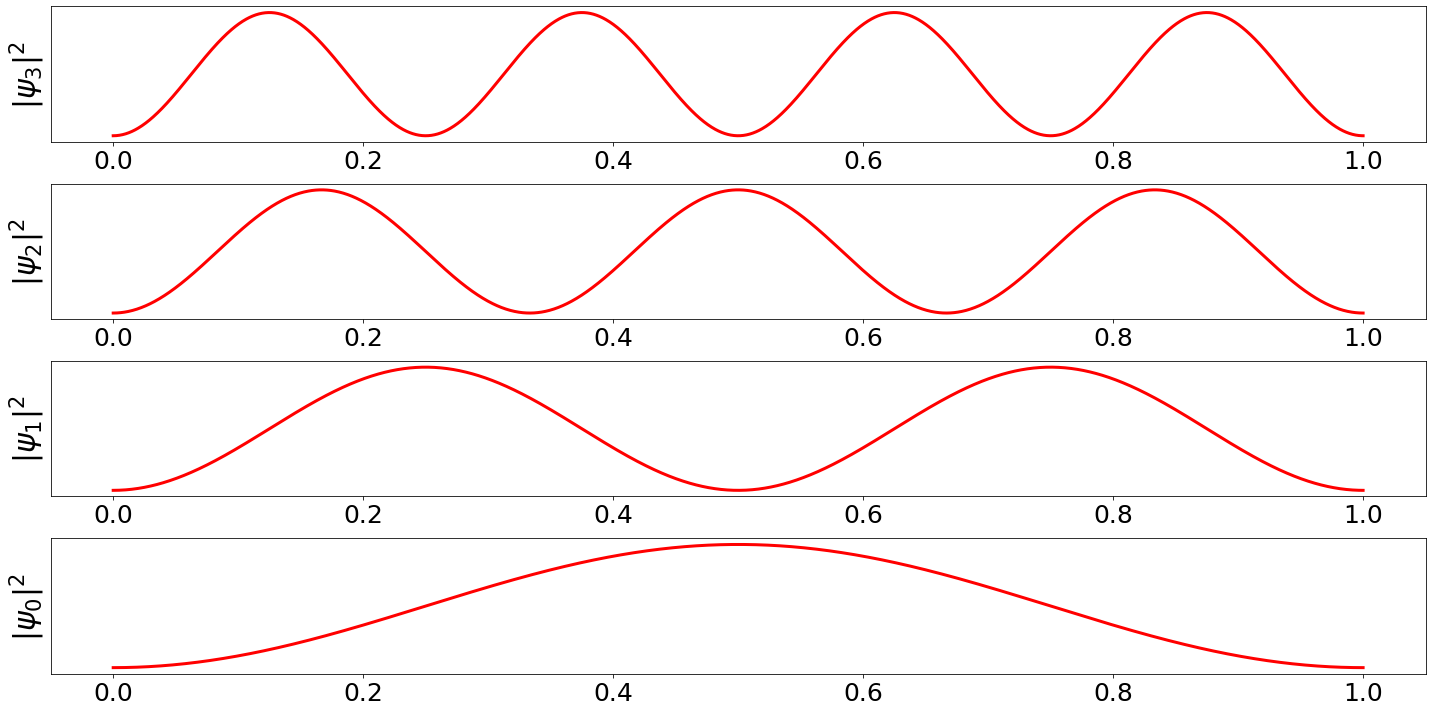

In [34]:
figname = 'wavefunction.png'

plt.subplot(4, 1, 1)
plt.plot(x,psi_teste[3] ** 2, label="n ="+str(1), linewidth=3, color='red')
plt.ylabel(r"$|\psi_3|^2$", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks([])

plt.subplot(4, 1, 2)
plt.plot(x,psi_teste[2] ** 2, label="n ="+str(1), linewidth=3, color='red')
plt.ylabel(r"$|\psi_2|^2$", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks([])


plt.subplot(4, 1, 3)
plt.plot(x,psi_teste[1] ** 2, label="n ="+str(1), linewidth=3, color='red')
plt.ylabel(r"$|\psi_1|^2$", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks([])


plt.subplot(4, 1, 4)
plt.plot(x,psi_teste[0] ** 2, label="n ="+str(0), linewidth=3, color='red')
plt.ylabel(r"$|\psi_0|^2$", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks([])

# plt.ylim(0,140)
# plt.yticks(fontsize=14)
# plt.xticks([-3.4,0,3.4],[r'-$\pi/a$',0,r'$\pi/a$'],fontsize=16)
# plt.xlabel('time (s)')
# plt.ylabel('Undamped')


plt.tight_layout()
plt.rcParams['figure.figsize'] = [20, 10]
plt.savefig(f'{figname}', dpi=300, bbox_inches='tight')

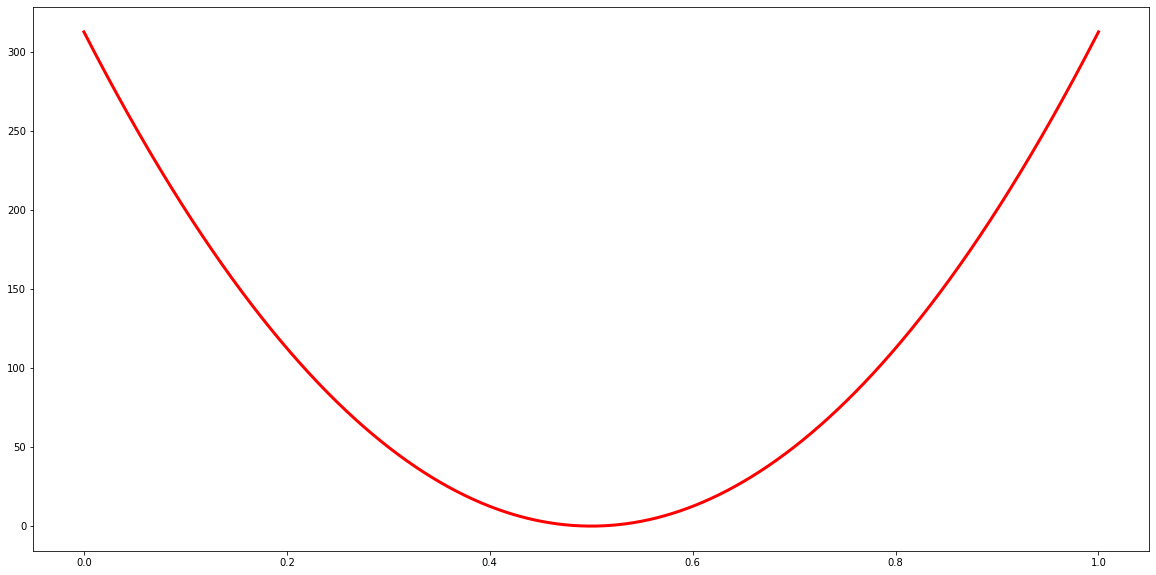

In [37]:
plt.plot(x, V_x, color='r', linewidth=3)